# Midterm 2. Solutions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from CHAID import Tree

In [2]:
data=pd.read_csv("Startup_data.csv")

# Section 2. Problem 1_1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 51 columns):
ID                                          234 non-null object
Success                                     234 non-null int64
Company_Location                            234 non-null object
Company_raising_fund                        234 non-null object
Company_Industry_count                      234 non-null object
Company_mobile_app                          234 non-null object
Company_investor_count_seed                 234 non-null int64
Company_investor_count_Angel_VC             234 non-null int64
Company_cofounders_count                    234 non-null int64
Company_advisors_count                      234 non-null int64
Company_senior_team_count                   234 non-null int64
Company_top_Angel_VC_funding                234 non-null object
Company_repeat_investors_count              234 non-null int64
Founders_top_company_experience             234 non-null object
Founde

In [4]:
data.drop("ID",axis=1,inplace=True)

# Section 2. Problem 1_2

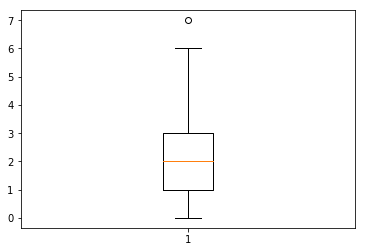

In [5]:
plt.boxplot(data.Company_cofounders_count)
plt.show()

# Section 2. Problem 1_3

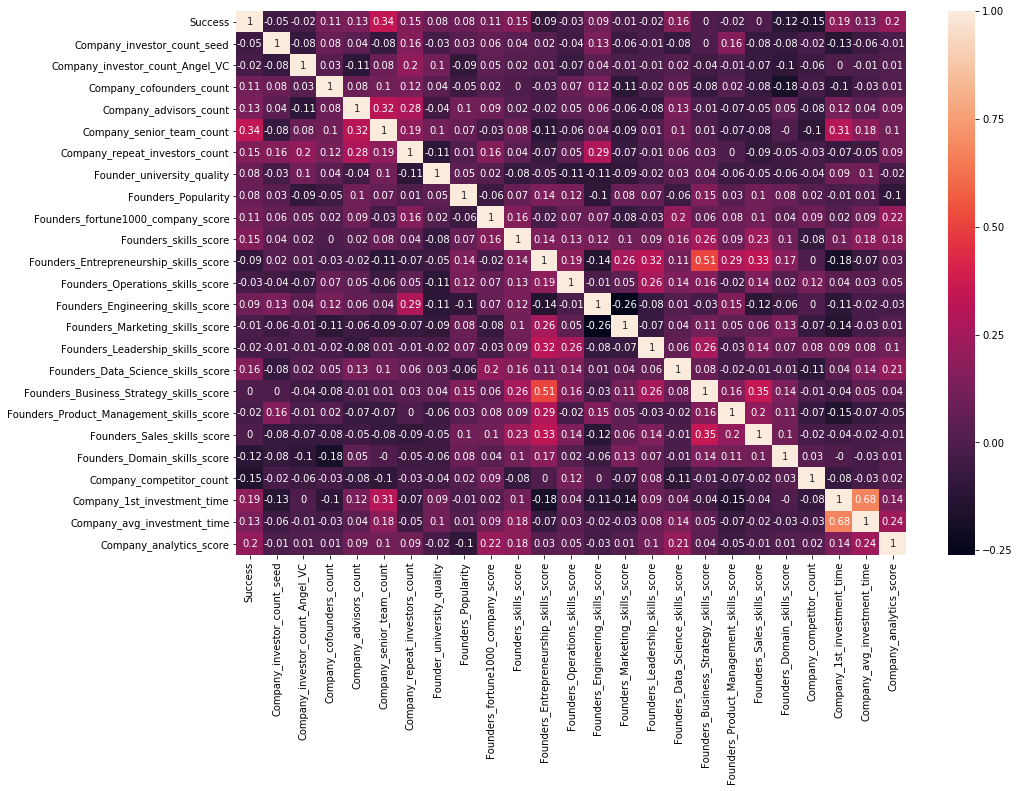

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr().round(2),annot=True)
plt.show()

# Section 2. Problem 1_4

In [7]:
data.Company_Location.value_counts()

USA       179
Europe     42
Other      13
Name: Company_Location, dtype: int64

# Section 2. Problem 1_5

In [8]:
data_num=data.select_dtypes(exclude="object")

In [9]:
formula="Success~"+"+".join(data_num.iloc[:,1:].columns)
formula

'Success~Company_investor_count_seed+Company_investor_count_Angel_VC+Company_cofounders_count+Company_advisors_count+Company_senior_team_count+Company_repeat_investors_count+Founder_university_quality+Founders_Popularity+Founders_fortune1000_company_score+Founders_skills_score+Founders_Entrepreneurship_skills_score+Founders_Operations_skills_score+Founders_Engineering_skills_score+Founders_Marketing_skills_score+Founders_Leadership_skills_score+Founders_Data_Science_skills_score+Founders_Business_Strategy_skills_score+Founders_Product_Management_skills_score+Founders_Sales_skills_score+Founders_Domain_skills_score+Company_competitor_count+Company_1st_investment_time+Company_avg_investment_time+Company_analytics_score'

In [10]:
logit1=Logit.from_formula(formula=formula,data=data_num).fit()

Optimization terminated successfully.
         Current function value: 0.555748
         Iterations 6


In [11]:
logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                  234
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                           24
Date:                Sat, 27 Apr 2019   Pseudo R-squ.:                  0.1982
Time:                        16:15:22   Log-Likelihood:                -130.05
converged:                       True   LL-Null:                       -162.19
                                        LLR p-value:                 1.548e-05
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.0481      0.749     -4.070      0.000      -4.516      -1.580
Company_investor_count_seed                 -0.0584      0.056     -1.047      0.295      -0.168       0.051
Company_investor_count_Angel_VC             -0.1549      0.096     -1.614      0.107      -0.343       0.033
Company_cofounders_count                     0.1481      0.137      1.079      0.281      -0.121       0.417
Company_advisors_count                      -0.0447      0.081     -0.551      0.582      -0.204       0.114
Company_senior_team_count                    0.2737      0.077      3.534      0.000       0.122       0.425
Company_repeat_investors_count               0.1867      0.128      1.462      0.144      -0.064       0.437
Founder_university_quality                   0.1033      0.088      1.168      0.243      -0.070       0.277
Founders_Popularity                          0.6971      0.442      1.579      0.114      -0.168       1.562
Founders_fortune1000_company_score           0.4371      0.444      0.984      0.325      -0.433       1.308
Founders_skills_score                        0.0177      0.016      1.103      0.270      -0.014       0.049
Founders_Entrepreneurship_skills_score      -0.0238      0.032     -0.750      0.453      -0.086       0.038
Founders_Operations_skills_score            -0.0433      0.047     -0.924      0.355      -0.135       0.049
Founders_Engineering_skills_score            0.0075      0.007      1.022      0.307      -0.007       0.022
Founders_Marketing_skills_score              0.0101      0.010      1.038      0.299      -0.009       0.029
Founders_Leadership_skills_score         -9.567e-05      0.032     -0.003      0.998      -0.064       0.064
Founders_Data_Science_skills_score           0.0230      0.019      1.219      0.223      -0.014       0.060
Founders_Business_Strategy_skills_score     -0.0004      0.019     -0.019      0.985      -0.038       0.037
Founders_Product_Management_skills_score     0.0148      0.034      0.429      0.668      -0.053       0.082
Founders_Sales_skills_score                  0.0225      0.034      0.671      0.502      -0.043       0.088
Founders_Domain_skills_score                -0.0477      0.022     -2.190      0.029      -0.090      -0.005
Company_competitor_count                    -0.0743      0.053     -1.412      0.158      -0.177       0.029
Company_1st_investment_time                  0.0201      0.013      1.601      0.109      -0.005       0.045
Company_avg_investment_time                 -0.0096      0.018     -0.527      0.598      -0.045       0.026
Company_analytics_score                      0.3442      0.161      2.139      0.032       0.029       0.659
============================================================================================================
"""

In [12]:
for i in logit1.pvalues[logit1.pvalues<0.05].index:
    print(i,logit1.params[i])

Intercept -3.0481283512054134
Company_senior_team_count 0.27369246632358557
Founders_Domain_skills_score -0.047729736514850386
Company_analytics_score 0.3441507263973692


# Section 2. Problem 2_1

In [13]:
data_final=pd.get_dummies(data,drop_first=True)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 64 columns):
Success                                            234 non-null int64
Company_investor_count_seed                        234 non-null int64
Company_investor_count_Angel_VC                    234 non-null int64
Company_cofounders_count                           234 non-null int64
Company_advisors_count                             234 non-null int64
Company_senior_team_count                          234 non-null int64
Company_repeat_investors_count                     234 non-null int64
Founder_university_quality                         234 non-null int64
Founders_Popularity                                234 non-null int64
Founders_fortune1000_company_score                 234 non-null float64
Founders_skills_score                              234 non-null float64
Founders_Entrepreneurship_skills_score             234 non-null float64
Founders_Operations_skills_score                 

# Section 2. Problem 2_2

In [14]:
X=data_final.drop("Success",axis=1)
Y=data_final.Success
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
Y.value_counts()/len(Y)

0    0.504274
1    0.495726
Name: Success, dtype: float64

In [16]:
grids_tree=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'),
                        param_grid={"max_depth":range(3,10),"min_samples_leaf":range(20,70)},
                        cv=5,n_jobs=-1,scoring="roc_auc").fit(X,Y)
grids_logit=GridSearchCV(LogisticRegression(random_state=42,class_weight='balanced'),
                        param_grid={"C":np.linspace(0.00001,20,10),"penalty":["l1","l2"]},
                         cv=5,n_jobs=-1,scoring="roc_auc").fit(X,Y)

In [17]:
print("tree best params:",grids_tree.best_params_)
print("logit best params:",grids_logit.best_params_)

tree best params: {'max_depth': 3, 'min_samples_leaf': 50}
logit best params: {'C': 1e-05, 'penalty': 'l2'}


# Section 2. Problem 2_3

In [18]:
tree=DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=3,min_samples_leaf=50).fit(X_train,Y_train)
logit=LogisticRegression(random_state=42,class_weight='balanced',C=1e-05,penalty="l2").fit(X_train,Y_train)

In [19]:
pd.DataFrame(tree.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).head(3)

,0
Company_senior_team_count,0.785561
Founders_previous_company_employee_count_Small,0.214439
Founders_profile_similarity_None,0.000000


# Section 2. Problem 2_4

In [20]:
#Train
model={"tree":tree,"logit":logit}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(Y_train,models.predict(X_train)).round(2)*100)


 Recall
tree 59.0
logit 94.0

 ROC_AUC
tree 67.0
logit 52.0

 Accuracy
tree 67.0
logit 52.0


In [21]:
#Test
model={"tree":tree,"logit":logit}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(Y_test,models.predict(X_test)).round(2)*100)


 Recall
tree 48.0
logit 93.0

 ROC_AUC
tree 56.99999999999999
logit 52.0

 Accuracy
tree 57.99999999999999
logit 51.0


# CHAID

In [22]:
X_obj=data.select_dtypes(include="object")

In [23]:
tree_chaid=Tree.from_pandas_df(X_obj.join(Y),dict(zip(X_obj.columns, ['nominal'])),"Success")

In [24]:
tree_chaid.print_tree()

([], {0: 118.0, 1: 116.0}, <Invalid Chaid Split> - p-value greater than alpha merge)



In [25]:
tree_chaid_numX=Tree.from_pandas_df(data_num,dict(zip(data_num.drop("Success",axis=1).columns, ['ordinal'])),`
                                    "Success",alpha_merge=0.1)

In [26]:
tree_chaid_numX.print_tree()

([], {0: 118.0, 1: 116.0}, (Company_investor_count_seed, p=0.031720620744942626, score=10.579404013545043, groups=[[0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [13], [15], [17]]), dof=4))
|-- ([0], {0: 56.0, 1: 75.0}, <Invalid Chaid Split> - the node only contains single category respondents)
|-- ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], {0: 61.0, 1: 39.0}, <Invalid Chaid Split> - p-value greater than alpha merge)
|-- ([13], {0: 0, 1: 1.0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)
|-- ([15], {0: 0, 1: 1.0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)
+-- ([17], {0: 1.0, 1: 0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)

